In [81]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [82]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query ariv papers")
print(arxiv.name)

arxiv


In [83]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [84]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [85]:
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [86]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()


In [87]:
tavily.invoke("Provide me all the recent AI news")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': 'Artificial Intelligence News\n\nTop Headlines\n\nLatest Headlines\n\nEarlier Headlines\n\nThursday, April 3, 2025\n\nThursday, March 27, 2025\n\nWednesday, March 26, 2025\n\nTuesday, March 25, 2025\n\nWednesday, March 19, 2025\n\nTuesday, March 18, 2025\n\nMonday, March 17, 2025\n\nThursday, March 6, 2025\n\nWednesday, March 5, 2025\n\nTuesday, March 4, 2025\n\nWednesday, February 26, 2025\n\nTuesday, February 25, 2025\n\nFriday, February 21, 2025\n\nThursday, February 20, 2025\n\nWednesday, February 19, 2025 [...] Thursday, February 13, 2025\n\nMonday, February 10, 2025\n\nMonday, February 3, 2025\n\nWednesday, January 29, 2025\n\nTuesday, January 28, 2025\n\nMonday, January 27, 2025\n\nTuesday, January 21, 2025\n\nThursday, January 16, 2025\n\nWednesday, January 15, 2025\n\nTuesday, January 14, 2025\n\nThursday, January 9, 2025\

In [88]:
## combine all tools 
tools = [arxiv,wiki,tavily]

In [89]:
## Intialize the LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")

In [90]:
llm.invoke("What is AI?")

AIMessage(content='\n<think>\nOkay, so the user is asking, "What is AI?" Let me start by breaking down what I know about AI. First, I should define AI in simple terms. Maybe start with the acronym—Artificial Intelligence. Then explain that it\'s about making machines smart, so they can do tasks that usually need human intelligence. But wait, I should make sure that definition is accurate.\n\nHmm, I remember reading that AI involves things like learning, problem-solving, and perception. Maybe I should list some key characteristics. Also, there are different types of AI. Like narrow or weak AI versus general or strong AI. Narrow AI is what we see now, like Siri or Alexa, right? They do specific tasks but aren\'t self-aware. General AI is the hypothetical kind that can handle any intellectual task a human can, which isn\'t around yet.\n\nI should mention some applications to make it concrete. Examples like recommendation systems on Netflix, self-driving cars, chatbots. That helps people r

In [91]:
llm_with_tools=llm.bind_tools(tools=tools)

In [92]:
llm_with_tools.invoke("What is the recent news on ai?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kjak', 'function': {'arguments': '{"query": "recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 356, 'total_tokens': 526, 'completion_time': 0.414820166, 'prompt_time': 0.090451017, 'queue_time': 0.45721851299999994, 'total_time': 0.505271183}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d2b26c0f-5dc9-45d7-b1c8-c35132d61665-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'call_kjak', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 170, 'total_tokens': 526})

In [93]:
llm_with_tools.invoke("What is ml?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3msb', 'function': {'arguments': '{"query": "Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 179, 'prompt_tokens': 352, 'total_tokens': 531, 'completion_time': 0.435917111, 'prompt_time': 0.052623073, 'queue_time': 0.27459707699999997, 'total_time': 0.488540184}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-86dbb077-7eff-4733-b020-4ba73417d773-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': 'call_3msb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 352, 'output_tokens': 179, 'total_tokens': 531})

#### WORKFLOW

In [94]:
#State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [95]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [96]:
## Entire Chatbot with Langgraph

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

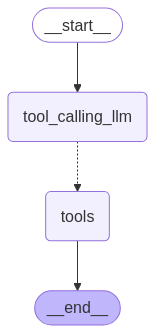

In [97]:
def tool_calling_llm(state: State):
    return {"message:": [llm_with_tools.invoke(state["messages"])]}

#Buildgraph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

##Edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",tools_condition)
builder.add_edge("tools",END)
graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))